In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
from cnnlib import utils, data_utils, functions
import torch.nn.functional as F

### Constants

In [12]:
BATCH_SIZE = 256
NUM_OF_DATASET_WORKERS = 2
DATA_SET_DIR = "../../data"
DEVICE = utils.getDevice()

print(f'Using device - {DEVICE}')

Using device - cuda


### Download the CIFAR dataset

Files already downloaded and verified
Files already downloaded and verified
Number of train images: 50000
Number of test images: 10000


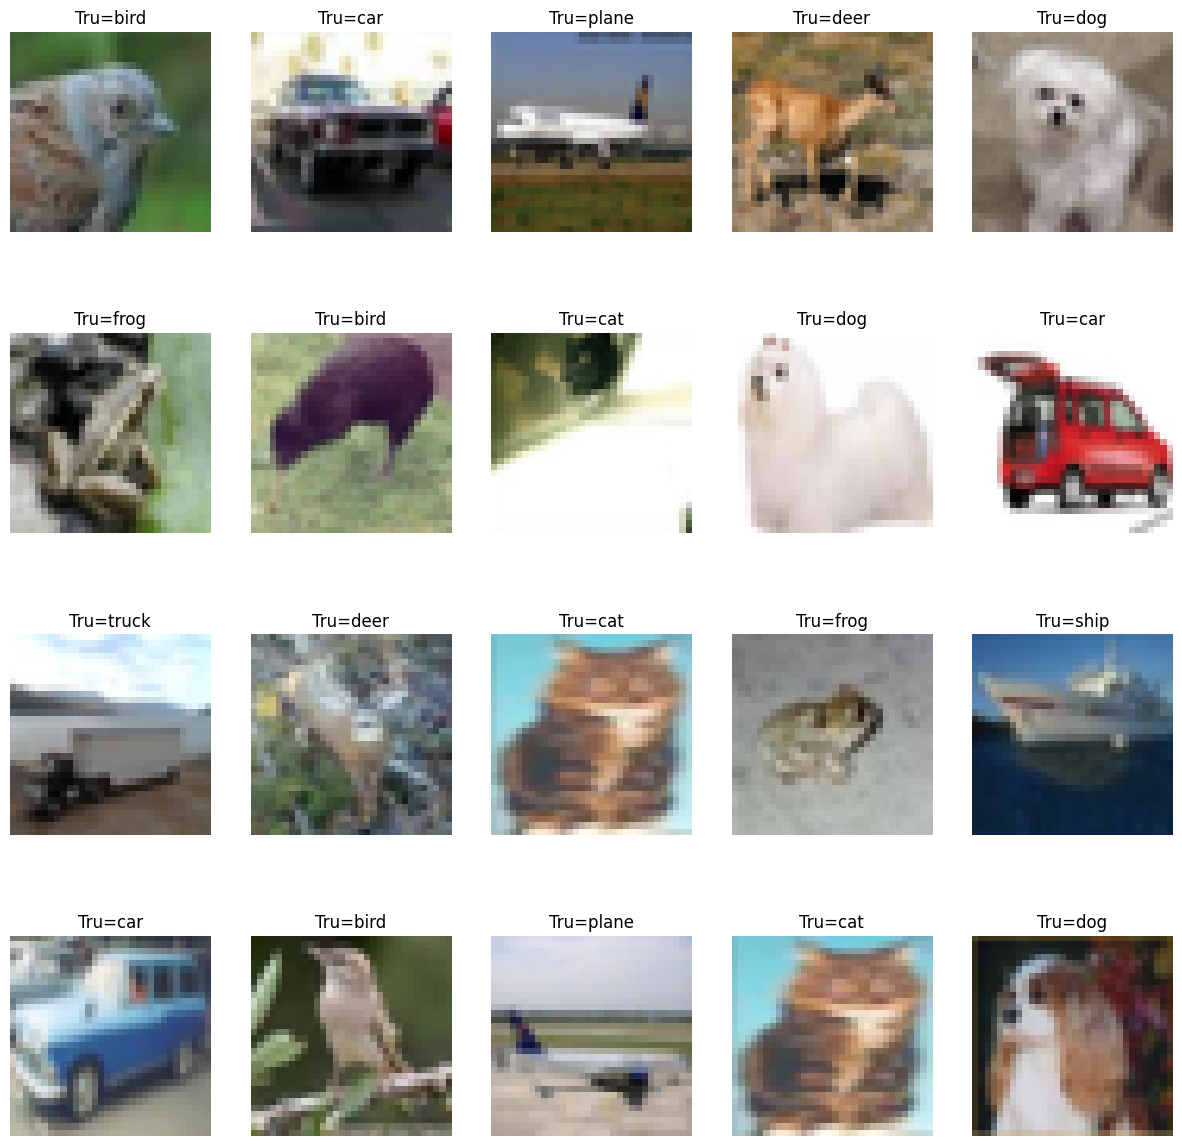

In [13]:
mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean, std)
    ])

data = data_utils.download_CIFAR10(transform, transform, BATCH_SIZE)

data_utils.showLoaderImages(data.train, classes=data.classes, count=20, muSigmaPair=(mean, std))

### Load the model

In [14]:
from models import ultimus
import torch.nn as nn

net = ultimus.Net().to(DEVICE)
net.summarize((3, 32, 32))
criterion = nn.CrossEntropyLoss()


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
            Conv2d-4           [-1, 32, 32, 32]           4,608
              ReLU-5           [-1, 32, 32, 32]               0
       BatchNorm2d-6           [-1, 32, 32, 32]              64
            Conv2d-7           [-1, 48, 32, 32]          13,824
              ReLU-8           [-1, 48, 32, 32]               0
       BatchNorm2d-9           [-1, 48, 32, 32]              96
AdaptiveAvgPool2d-10             [-1, 48, 1, 1]               0
        Embedding-11             [-1, 48, 1, 1]               0
           Linear-12                    [-1, 8]             392
           Linear-13                    [-1, 8]             392
           Linear-14                   

### LR Finder

In [15]:
import torch.optim as optim
from cnnlib.lr_finder import LRFinder

optimizer = optim.Adam(net.parameters(), lr = 0.001, weight_decay=0.01)
finder = LRFinder(net, optimizer, criterion, device="cuda")

finder.range_test(data.train, val_loader=data.test, start_lr=0.001, end_lr=1,
                     num_iter= 500, step_mode="exp")

 75%|███████▍  | 373/500 [07:17<02:28,  1.17s/it]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


Best LR: 0.020606299132700002


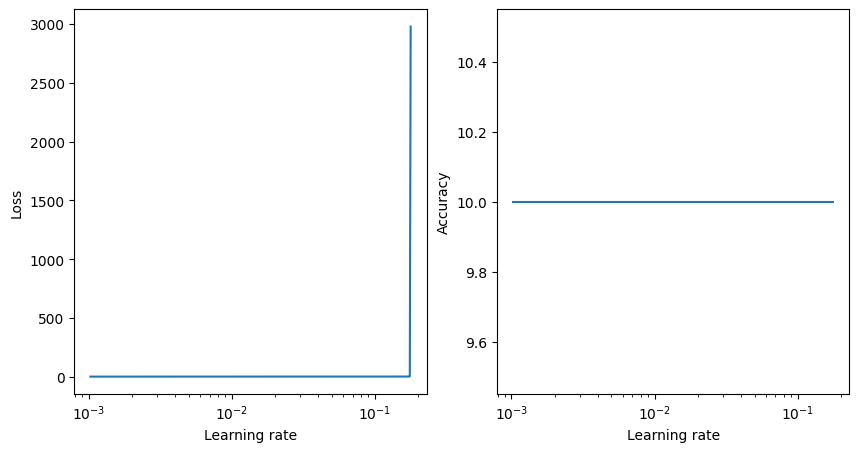

In [16]:
bestLR = finder.history["lr"][finder.history["loss"].index(finder.best_loss)]
print(f"Best LR: {bestLR}")

finder.plot()
finder.reset()

### Train the model

In [17]:
from torch.optim.lr_scheduler import OneCycleLR
from cnnlib.model_builder import ModelBuilder

EPOCH = 24

scheduler = OneCycleLR(optimizer, max_lr=0.015, epochs=EPOCH, steps_per_epoch=len(data.train), 
                       pct_start=5/EPOCH, anneal_strategy='linear', div_factor=25.0, final_div_factor=1)
builder = ModelBuilder(net, data, criterion, optimizer, scheduler)
result = builder.fit(EPOCH)



Epoch: 1


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 38.22it/s]


Train Accuracy: 9.722%, Train Loss: 0.009031848981976509, Learning Rate: 0.0006


100%|███████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 36.33it/s]


Test Accuracy: 10.0%, Test Loss: 0.009211862459778786


Epoch: 2


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 38.06it/s]


Train Accuracy: 9.97%, Train Loss: 0.009027425199747086, Learning Rate: 0.0034829417773237998


Epoch: 3


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 37.81it/s]


Train Accuracy: 9.906%, Train Loss: 0.009027475491166115, Learning Rate: 0.0063658835546476


Epoch: 4


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 37.74it/s]


Train Accuracy: 10.038%, Train Loss: 0.009027949534356594, Learning Rate: 0.009248825331971399


Epoch: 5


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 37.22it/s]


Train Accuracy: 10.12%, Train Loss: 0.009028682485222816, Learning Rate: 0.0121317671092952


Epoch: 6


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 37.39it/s]


Train Accuracy: 9.768%, Train Loss: 0.00902935117483139, Learning Rate: 0.014996133190118152


100%|███████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 33.64it/s]


Test Accuracy: 10.0%, Test Loss: 0.009212428703904152


Epoch: 7


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 37.10it/s]


Train Accuracy: 9.892%, Train Loss: 0.009028579108417034, Learning Rate: 0.014238238453276047


Epoch: 8


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 37.24it/s]


Train Accuracy: 9.638%, Train Loss: 0.009029197506606579, Learning Rate: 0.013480343716433942


Epoch: 9


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 37.03it/s]


Train Accuracy: 9.942%, Train Loss: 0.009028250351548195, Learning Rate: 0.012722448979591836


Epoch: 10


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 38.08it/s]


Train Accuracy: 9.938%, Train Loss: 0.009028376080095768, Learning Rate: 0.01196455424274973


Epoch: 11


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 37.00it/s]


Train Accuracy: 9.742%, Train Loss: 0.009028605185449123, Learning Rate: 0.011206659505907626


100%|███████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.86it/s]


Test Accuracy: 10.0%, Test Loss: 0.009212037548422813


Epoch: 12


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 37.85it/s]


Train Accuracy: 10.03%, Train Loss: 0.00902815442532301, Learning Rate: 0.01044876476906552


Epoch: 13


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 37.58it/s]


Train Accuracy: 10.042%, Train Loss: 0.009027586318552494, Learning Rate: 0.009690870032223416


Epoch: 14


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 36.98it/s]


Train Accuracy: 10.09%, Train Loss: 0.009027683176100254, Learning Rate: 0.008932975295381309


Epoch: 15


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 37.60it/s]


Train Accuracy: 9.926%, Train Loss: 0.009027828462421894, Learning Rate: 0.008175080558539206


Epoch: 16


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 37.69it/s]


Train Accuracy: 9.778%, Train Loss: 0.009027017280459404, Learning Rate: 0.007417185821697099


100%|███████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.41it/s]


Test Accuracy: 10.0%, Test Loss: 0.009212731383740902


Epoch: 17


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 37.08it/s]


Train Accuracy: 9.622%, Train Loss: 0.00902800727635622, Learning Rate: 0.006659291084854994


Epoch: 18


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 37.27it/s]


Train Accuracy: 9.774%, Train Loss: 0.009027233347296715, Learning Rate: 0.005901396348012889


Epoch: 19


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 37.64it/s]


Train Accuracy: 9.758%, Train Loss: 0.009027424268424511, Learning Rate: 0.005143501611170784


Epoch: 20


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 37.28it/s]


Train Accuracy: 9.792%, Train Loss: 0.009027127176523209, Learning Rate: 0.004385606874328677


Epoch: 21


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 37.36it/s]


Train Accuracy: 9.946%, Train Loss: 0.009026848711073399, Learning Rate: 0.003627712137486574


100%|███████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 31.91it/s]


Test Accuracy: 10.0%, Test Loss: 0.009210634045302868


Epoch: 22


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 37.45it/s]


Train Accuracy: 9.684%, Train Loss: 0.009026804938912392, Learning Rate: 0.0028698174006444675


Epoch: 23


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 36.07it/s]


Train Accuracy: 9.698%, Train Loss: 0.009026655927300453, Learning Rate: 0.0021119226638023625


Epoch: 24


100%|█████████████████████████████████████████████████████████████| 196/196 [00:05<00:00, 37.28it/s]


Train Accuracy: 9.97%, Train Loss: 0.009026512503623962, Learning Rate: 0.0013540279269602575


100%|███████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.51it/s]

Test Accuracy: 10.0%, Test Loss: 0.009210405871272087


### Plot metrics

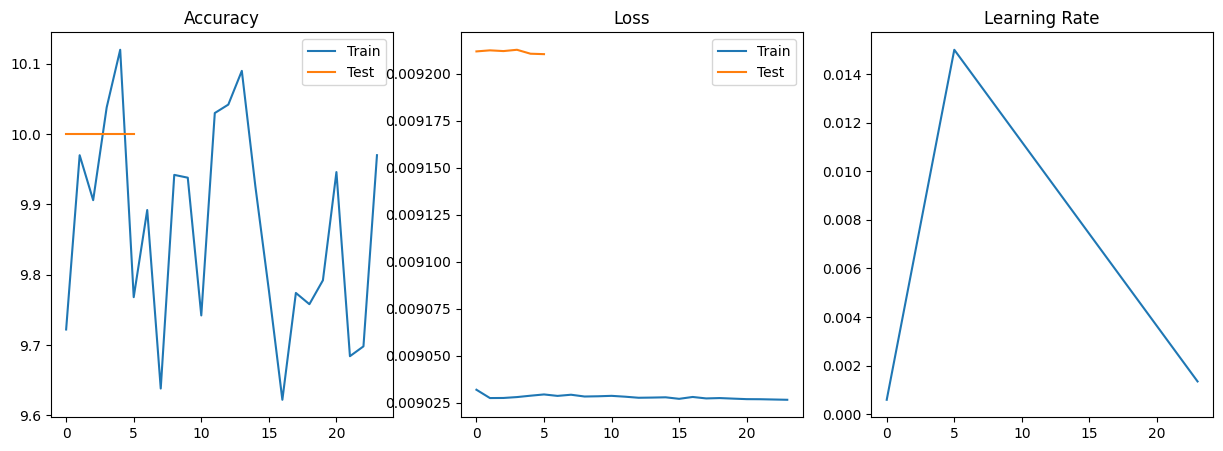

In [18]:
from cnnlib import metrics_utils
metrics_utils.plotMetrics(result)